In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Simple linear regression

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


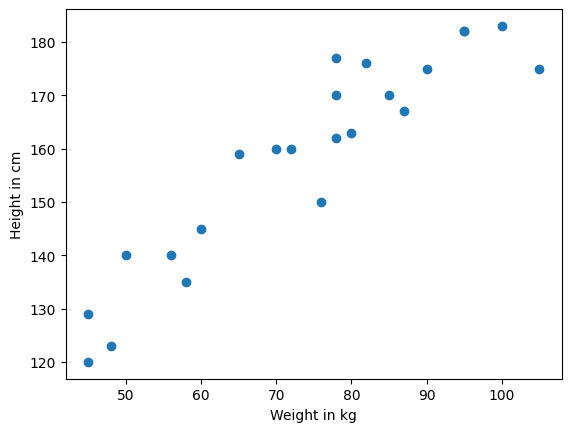

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight in kg")
plt.ylabel("Height in cm")
plt.show()

### Aim to find best fit line

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [6]:
# Independet and dependent
# independent feature

X=df[['Weight']]
X.shape

(23, 1)

In [7]:
y=df['Height']
y.shape

(23,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.20, random_state=42) 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [11]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [12]:
X_test=scaler.transform(X_test)

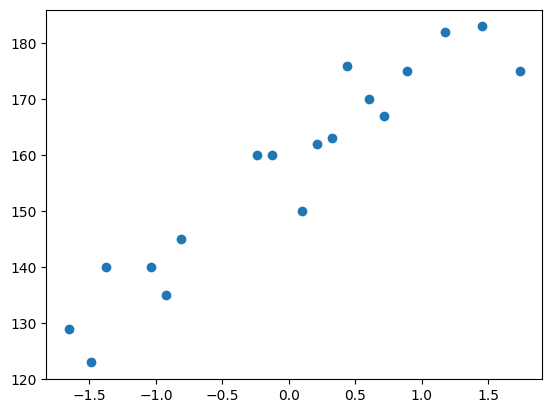

In [14]:
plt.scatter(X_train,y_train)

In [15]:
# Train the model
# simple linear regression

In [16]:
reg=LinearRegression() 

In [17]:
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
reg.intercept_

np.float64(157.5)

In [19]:
reg.coef_

array([17.03440872])

In [20]:
y_pred=reg.predict(X_test) 

## Best fit line

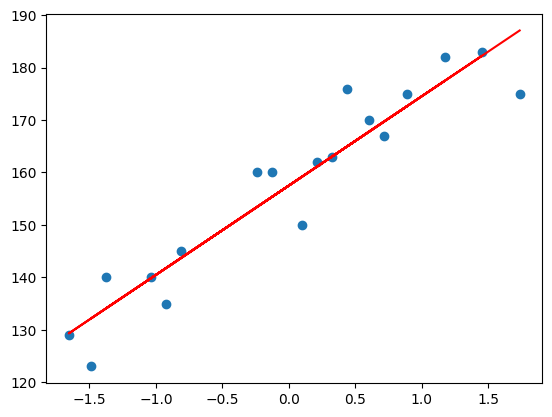

In [25]:
plt.scatter(X_train, y_train) 
plt.plot(X_train,reg.predict(X_train),'r')

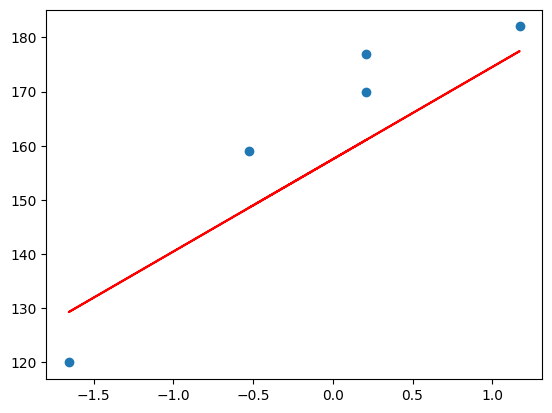

In [26]:
# For test data
plt.scatter(X_test, y_test) 
plt.plot(X_test,reg.predict(X_test),'r')

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)
print(mean_absolute_error(y_test,y_pred))
n=len(y_test)
k=1
adj_score=1-(((1-score)*(n-1))/(n-k-1))
print(adj_score)

0.776986986042344
9.822657814519232
0.7026493147231252


In [31]:
# prediction for new data points

test_weight=scaler.transform([[80]])
print(reg.predict(test_weight))

[163.01076266]


c:\Users\tilak\PycharmProjects\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


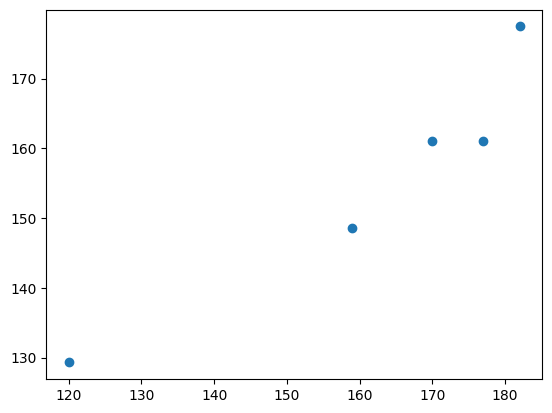

In [32]:
# Assumptions
# plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

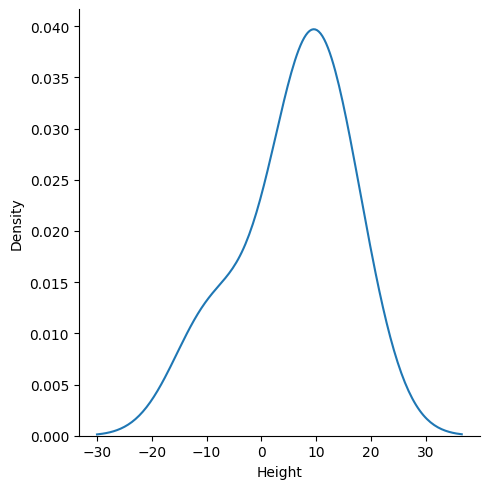

In [ ]:
# Residuals
residuls=y_test-y_pred
residuls
sns.displot(residuls,kind='kde')

In [35]:
# OLS use for finding best fit line

import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
model.predict(X_test)

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

In [36]:
model.summary()

c:\Users\tilak\PycharmProjects\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 17 Mar 2025   Prob (F-statistic):                       0.661
Time:                        10:05:12   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""